<a href="https://colab.research.google.com/github/infinityAJ/stock_smart/blob/main/sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install pandas-datareader
!pip install scikit-learn
!pip install tensorflow

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
company = 'FB'

In [ ]:
start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)

In [ ]:
data = web.DataReader(company, 'yahoo', start, end)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [ ]:
prediction_days = 60
x_train = []
y_train = []

In [ ]:
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
59/59 [==============================] - 9s 72ms/step - loss: 0.0568
Epoch 2/25
59/59 [==============================] - 4s 75ms/step - loss: 0.0073
Epoch 3/25
59/59 [==============================] - 5s 77ms/step - loss: 0.0041
Epoch 4/25
59/59 [==============================] - 4s 75ms/step - loss: 0.0036
Epoch 5/25
59/59 [==============================] - 4s 76ms/step - loss: 0.0037
Epoch 6/25
59/59 [==============================] - 4s 75ms/step - loss: 0.0030
Epoch 7/25
59/59 [==============================] - 4s 73ms/step - loss: 0.0033
Epoch 8/25
59/59 [==============================] - 4s 74ms/step - loss: 0.0030
Epoch 9/25
59/59 [==============================] - 4s 72ms/step - loss: 0.0032
Epoch 10/25
59/59 [==============================] - 4s 73ms/step - loss: 0.0026
Epoch 11/25
59/59 [==============================] - 4s 72ms/step - loss: 0.0029
Epoch 12/25
59/59 [==============================] - 4s 73ms/step - loss: 0.0029
Epoch 13/25
59/59 [==================

### test the model accuracy on existing data

- load test data

In [ ]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

In [ ]:
test_data = web.DataReader(company, 'yahoo', test_start, test_end)

In [ ]:
actual_prices = test_data['Close'].values

In [ ]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [ ]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values

In [ ]:
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [ ]:
x_test = []

In [ ]:
for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predicted_prices = model.predict(x_test)

In [ ]:
predicted_prices = scaler.inverse_transform(predicted_prices)

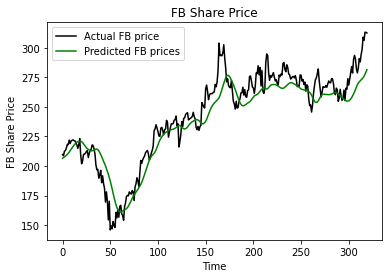

In [ ]:
plt.plot(actual_prices, color = "black", label=f"Actual {company} price")
plt.plot(predicted_prices, color='green', label=f'Predicted {company} prices')
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [ ]:
real_data = [model_inputs[len(model_inputs)+1-prediction_days:len(model_inputs+1), 0]]

In [ ]:
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [ ]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")

Prediction: [[283.43576]]


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(actual_prices, predicted_prices))

0.8659847271261095
